In [1]:
import numpy as np
import scipy
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import csv

from astropy.io import fits
from astropy.coordinates import match_coordinates_sky as coords
from astropy.coordinates import SkyCoord  # High-level coordinates
from astropy.coordinates import ICRS, Galactic, FK4, FK5  # Low-level frames
from astropy.coordinates import Angle, Latitude, Longitude  # Angles
import astropy.units as u

# Finding Common Galaxies between MaNGA and Spitzer 

In [2]:
sdss_file = fits.open(r"C:\Users\paiaa\Downloads\mnsa-0.3.0.fits")
spitzer_file = fits.open(r"C:\Users\paiaa\Downloads\asu (2).fit")

In [3]:
hdu_sdss = sdss_file[2]

In [4]:
#hdu_sdss.header

In [5]:
absmag = hdu_sdss.data['absmag']

In [6]:
W1 = absmag[:,5]
W2 = absmag[:,6]
W3 = absmag[:,7]

In [7]:
x1 = W2 - W3
y1 = W1 - W2

In [8]:
hdu_spi = spitzer_file[1]
#hdu_spi.header

In [9]:
ra_spi = hdu_spi.data['RAJ2000'] * u.deg
dec_spi = hdu_spi.data['DEJ2000'] * u.deg

coords_spi = SkyCoord(ra = ra_spi, dec = dec_spi)


ra_sdss = sdss_file[1].data['ifura'] * u.deg
dec_sdss = sdss_file[1].data['ifudec'] * u.deg

coords_sdss = SkyCoord(ra = ra_sdss, dec = dec_sdss)


In [10]:
idx, sep2d, dist3d = coords(coords_sdss, coords_spi)

In [11]:
matched_coords = pd.DataFrame()
matched_coords['matched index (in spitzer)'] = idx
matched_coords['angular sep (deg)'] = sep2d.value
matched_coords['distance'] = dist3d
matched_coords['plateifu'] = hdu_sdss.data['plateifu']

matched_coords = matched_coords.sort_values(by=['distance'])
#matched_coords.to_csv("matched coords")
matched_coords

,matched index (in spitzer),angular sep (deg),distance,plateifu
9977,245,0.000011,1.894030e-07,9189-6102
4984,1540,0.000016,2.814019e-07,8091-6101
9830,847,0.000023,4.008523e-07,9181-12702
365,576,0.000028,4.957184e-07,10223-3702
3955,1332,0.000029,5.061434e-07,12514-6103
...,...,...,...,...
2920,1235,17.284717,3.005326e-01,11986-12703
2922,1235,17.326551,3.012544e-01,11986-12705
2924,1235,17.378607,3.021525e-01,11986-3703
2923,1235,17.379615,3.021699e-01,11986-1902


In [12]:
selected_objects = matched_coords
selected_objects['threshold'] = matched_coords['angular sep (deg)'] < 0.0005555
selected_objects.drop(selected_objects[selected_objects['threshold'] == False].index, inplace=True)
selected_objects = selected_objects.drop(['threshold'], axis = 1)
selected_objects.reset_index(inplace=True)

In [13]:
selected_objects

,index,matched index (in spitzer),angular sep (deg),distance,plateifu
0,9977,245,0.000011,1.894030e-07,9189-6102
1,4984,1540,0.000016,2.814019e-07,8091-6101
2,9830,847,0.000023,4.008523e-07,9181-12702
3,365,576,0.000028,4.957184e-07,10223-3702
4,3955,1332,0.000029,5.061434e-07,12514-6103
5,7676,1133,0.000031,5.420524e-07,8612-1901
6,8748,725,0.000033,5.730790e-07,8978-3701
7,1555,1823,0.000041,7.218576e-07,11022-6104
8,4702,1869,0.000044,7.666612e-07,7991-6104
9,10436,1726,0.000044,7.759514e-07,9503-6102


# Plotting W1-W2-W3 for selected galaxies

In [14]:
W1_spi = np.array([])
W2_spi = np.array([])
W3_spi = np.array([])

for i in selected_objects['matched index (in spitzer)']:
    W1_spi = np.append(W1_spi, hdu_spi.data['W1mag'][i])
    W2_spi = np.append(W2_spi, hdu_spi.data['W2mag'][i])
    W3_spi = np.append(W3_spi, hdu_spi.data['W3mag'][i])

W1_sel = np.array([])
W2_sel = np.array([])
W3_sel = np.array([])

for i in selected_objects['index']:
    W1_sel = np.append(W1_sel, W1[i])
    W2_sel = np.append(W2_sel, W2[i])
    W3_sel = np.append(W3_sel, W3[i])

In [15]:
x_spi = W2_spi - W3_spi
y_spi = W1_spi - W2_spi

x_sdss = W2 - W3
y_sdss = W1 - W2

x_sel = W2_sel - W3_sel
y_sel = W1_sel - W2_sel

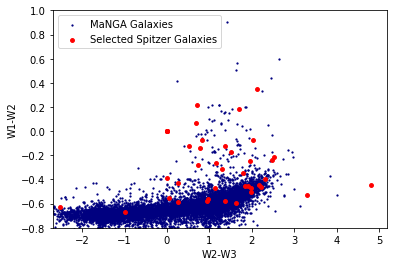

In [16]:
fig, ax = plt.subplots(ncols = 1)
ax.scatter(x_sdss, y_sdss, c = 'navy', s = 1.5, label = 'MaNGA Galaxies')
ax.scatter(x_sel, y_sel, c = 'red', s = 15, label = 'Selected Spitzer Galaxies')
ax.set_xlabel('W2-W3')
ax.set_ylabel('W1-W2')
ax.set_ylim(-0.8,1)
ax.set_xlim(-2.7, 5.2)
ax.legend()


In [17]:
hdu_summary = sdss_file[1]
#hdu_summary.header

In [18]:
pipe3d = hdu_summary.data['ipipe3d']


# Matching MaNGA, Pipe3D and Spitzer 

In [19]:
pipe3d_file = fits.open(r"C:\Users\paiaa\Downloads\SDSS17Pipe3D_v3_1_1.fits")

In [20]:
hdu_p3d = pipe3d_file[1]
#hdu_p3d.header

In [21]:
summary = hdu_summary.data
sps2 = hdu_sdss.data
pipe3d = hdu_p3d.data

has_pipe3d = summary['ipipe3d'] != -1
has_pipe3d = summary['wise_coadd_done'] != False
sps2_matched = sps2[has_pipe3d]
summary_matched = summary[has_pipe3d]
pipe3d_matched = pipe3d[summary_matched['ipipe3d']]

#hdu_sdss.header
#hdu_summary.header

In [22]:
ra_spi = hdu_spi.data['RAJ2000'] * u.deg
dec_spi = hdu_spi.data['DEJ2000'] * u.deg

coords_spi = SkyCoord(ra = ra_spi, dec = dec_spi)


ra_sdss_m = summary_matched['ifura'] * u.deg
dec_sdss_m = summary_matched['ifudec'] * u.deg

coords_sdss_m = SkyCoord(ra = ra_sdss_m, dec = dec_sdss_m)

In [23]:
idx_m, sep2d_m, dist3d_m = coords(coords_sdss_m, coords_spi)

In [24]:
matched_coords_m = pd.DataFrame()
matched_coords_m['matched index (in spitzer)'] = idx_m
matched_coords_m['angular sep (deg)'] = sep2d_m.value
matched_coords_m['distance'] = dist3d_m
matched_coords_m['plateifu'] = pipe3d_matched['plateifu']

matched_coords_m = matched_coords_m.sort_values(by=['distance'])

In [25]:
selected_objects_m = matched_coords_m
selected_objects_m['threshold'] = matched_coords_m['angular sep (deg)'] < 0.0005555
selected_objects_m.drop(selected_objects_m[selected_objects_m['threshold'] == False].index, inplace=True)
selected_objects_m = selected_objects_m.drop(['threshold'], axis = 1)
selected_objects_m.reset_index(inplace=True)
#selected_objects_m

# Plotting W1-W2 vs. log(sSFR) and W1-W2-W3-sSFR for MaNGA & selected galaxies

In [26]:
ssfr = pipe3d_matched['log_SFR_ssp']-(pipe3d_matched['log_mass'])
W1_m = sps2_matched['absmag'][:,5]
W2_m = sps2_matched['absmag'][:,6]
W3_m = sps2_matched['absmag'][:,7]

W1_m2 = np.array([])
W2_m2 = np.array([])
W3_m2 = np.array([])
ssfr2 = np.array([])
for i in range(W1_m.shape[0]):
    if W1_m[i] and W2_m[i] != 0:
        ssfr2 = np.append(ssfr2, ssfr[i])
        W1_m2 = np.append(W1_m2, W1_m[i])
        W2_m2 = np.append(W2_m2, W2_m[i])
        W3_m2 = np.append(W3_m2, W3_m[i])

W1_m_spi = np.array([])
W2_m_spi = np.array([])
W3_m_spi = np.array([])
ssfr_spi = np.array([])

for i in selected_objects_m['index']:
    W1_m_spi = np.append(W1_m_spi, W1_m[i])
    W2_m_spi = np.append(W2_m_spi, W2_m[i])
    W3_m_spi = np.append(W3_m_spi, W3_m[i])
    ssfr_spi = np.append(ssfr_spi, ssfr[i])

In [27]:
PAH_62_EW = spitzer_file[3].data['EW6_2']
PAH_62_EW = PAH_62_EW[selected_objects_m['matched index (in spitzer)']]

indices1 = ~np.isnan(PAH_62_EW)

In [28]:
silicate = spitzer_file[3].data['tau9_7'][selected_objects_m['matched index (in spitzer)']]
#silicate
indices2 = ~np.isnan(silicate)

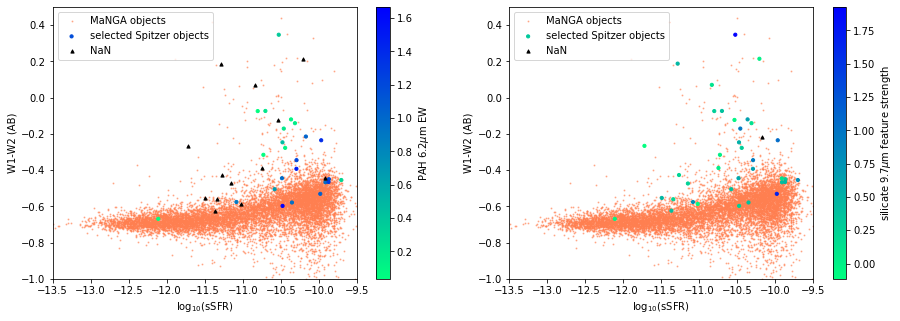

In [29]:
fig, ax = plt.subplots(ncols = 2, figsize = (15,5))
axa, axb = ax

axa.scatter(ssfr2, W1_m2-W2_m2, s = 1, c = 'coral', alpha = 0.5, label = 'MaNGA objects')
cax = axa.scatter(ssfr_spi[indices1], W1_m_spi[indices1]-W2_m_spi[indices1], s = 10, c = PAH_62_EW[indices1], cmap = 'winter_r', label = 'selected Spitzer objects')
#plot NaN values in black
axa.scatter(ssfr_spi[~indices1], W1_m_spi[~indices1]-W2_m_spi[~indices1], s = 10, c = 'black', marker = '^', label = 'NaN')
#creating colorbar
ca = fig.colorbar(cax, ax = axa)
ca.set_label('PAH 6.2$\mu$m EW')

axa.set_ylim(-1,0.5)
axa.set_xlim(-13.5,-9.5)

axa.set_ylabel('W1-W2 (AB)')
axa.set_xlabel('$\log_{10}$(sSFR)')
axa.legend()



axb.scatter(ssfr2, W1_m2-W2_m2, s = 1, c = 'coral', alpha = 0.5, label = 'MaNGA objects')
cab = axb.scatter(ssfr_spi[indices2], W1_m_spi[indices2]-W2_m_spi[indices2], s = 10, c = silicate[indices2], cmap = 'winter_r', label = 'selected Spitzer objects')
#plot NaN values in black
axb.scatter(ssfr_spi[~indices2], W1_m_spi[~indices2]-W2_m_spi[~indices2], s = 10, c = 'black', marker = '^', label = 'NaN')
#creating colorbar
cb = fig.colorbar(cab, ax = axb)
cb.set_label('silicate 9.7$\mu$m feature strength')

axb.set_ylim(-1,0.5)
axb.set_xlim(-13.5,-9.5)

axb.set_ylabel('W1-W2 (AB)')
axb.set_xlabel('$\log_{10}$(sSFR)')
axb.legend()

In [30]:
#PLATE-IFUs of selected objects
selected_plateifus =  pipe3d_matched['plateifu'][selected_objects_m['index']]
#selected_plateifus = []

#test = ~np.isnan(PAH_62_EW)
#test
#for i in range(test1.shape[0]):
    
    #if test[i] == False:
        #selected_plateifus.append(test1[i])
        
selected_plateifus = np.array(selected_plateifus)

# Plotting Spitzer spectra for selected objects

In [31]:
spitz_aor_hdu = spitzer_file[1]
identifier = pd.DataFrame()

identifier['index (in MaNGA)'] = selected_objects['index']
identifier['PlateIFU'] = hdu_sdss.data['plateifu'][selected_objects['index']]
identifier['index (in Spitzer)'] = selected_objects['matched index (in spitzer)']
identifier['AORkey'] = spitz_aor_hdu.data['AORkey'][selected_objects['matched index (in spitzer)']]
identifier.to_csv('Spitzer_MaNGA_matched_objs.csv')
#identifier


In [32]:
identifier['filter'] = identifier['PlateIFU'].isin(selected_plateifus)
aorkey = []
plateifu = []

for i in range(len(identifier['AORkey'])):
    if identifier['filter'][i] == True:
        aorkey.append(identifier["AORkey"][i])
        plateifu.append(identifier['PlateIFU'][i])
#identifier.to_csv('Selected_Spitzer_Objects.csv')